In [18]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [19]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [20]:
#784 pixels per image
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [21]:
#checking labels before change
labels = np.array((train_data['label'].unique()))
print(f"Sorted labels: {np.sort(labels)}")
print(f"No. labels: {len(labels)}")

Sorted labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
No. labels: 24


In [22]:
#sequential labels to solve potential problem with one hot encoding
train_data.loc[train_data['label'] > 8, 'label'] = train_data['label'] - 1
test_data.loc[train_data['label'] > 8, 'label'] = train_data['label'] - 1

In [23]:
#checking labels after change
labels = np.array((train_data['label'].unique()))
print(f"Sorted labels: {np.sort(labels)}")
print(f"No. labels: {len(labels)}")

Sorted labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
No. labels: 24


In [24]:
train_data.shape

(27455, 785)

In [25]:
#train/test split
X_train = np.array(train_data.drop(['label'], axis = 1, inplace=False))
y_train = np.array(train_data['label'])
X_test = np.array(test_data.drop(['label'], axis = 1, inplace=False))
y_test = np.array(test_data['label'])

In [26]:
print(X_train)
print(X_train.shape)

[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
(27455, 784)


In [27]:
#normalizing
X_train = X_train/255
X_train

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [45]:
X_test = X_test/255

In [28]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [29]:
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.8, random_state=123)

In [40]:
import importlib
import mlp
importlib.reload(mlp)
model = mlp.MLP()

In [41]:
model.train(X_train.T, y_train, X_val.T, y_val, alpha = 0.1, iterations=10000)

Iteration no.  0
Train acc:  0.04753232562374795
Val acc:  0.035785831360407944
Iteration no.  1000
Train acc:  0.22327444909852487
Val acc:  0.20242214532871972
Iteration no.  2000
Train acc:  0.36150063740666544
Val acc:  0.3302677107994901
Iteration no.  3000
Train acc:  0.4552904753232562
Val acc:  0.4144509196867602
Iteration no.  4000
Train acc:  0.5295938808960117
Val acc:  0.4420415224913495
Iteration no.  5000
Train acc:  0.6576215625569113
Val acc:  0.6225641959570206
Iteration no.  6000
Train acc:  0.6536150063740667
Val acc:  0.6415953378255327
Iteration no.  7000
Train acc:  0.7470406119103988
Val acc:  0.6900837734474595
Iteration no.  8000
Train acc:  0.5885995264979057
Val acc:  0.5445729375341468
Iteration no.  9000
Train acc:  0.578583136040794
Val acc:  0.5635585503551266


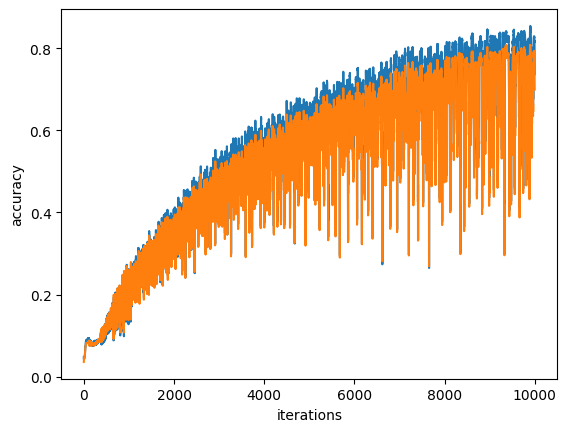

In [42]:
#promising learning curve
#sensitive to noise
model.learning_curve()

In [47]:
#does not generalize well to unseen data (still better than baseline 0.04 for random guessing)
model.test(X_test.T, y_test)

Test Accuracy:  0.1334355828220859
